**IMPORT THE RELEVANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

**READ IN THE DATASET**

In [2]:
df = pd.read_csv('cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**EXPLORATORY DATA ANALYSIS**

In [5]:
df.origin.value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

**CONVERT CATEGORICAL DATA TO NUMERICAL USING DUMMY VALUES**

In [6]:
df.drop('name', axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa
388,44.0,4,97.0,52.0,2130,24.6,82,europe
389,32.0,4,135.0,84.0,2295,11.6,82,usa
390,28.0,4,120.0,79.0,2625,18.6,82,usa


In [7]:
df_with_dummies = pd.get_dummies(df)

In [8]:
df_with_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,False,False,True,...,False,False,False,False,False,False,False,False,False,False
388,44.0,4,97.0,52.0,2130,24.6,82,True,False,False,...,False,False,False,False,False,False,True,False,False,False
389,32.0,4,135.0,84.0,2295,11.6,82,False,False,True,...,False,False,False,False,False,False,False,False,False,False
390,28.0,4,120.0,79.0,2625,18.6,82,False,False,True,...,False,False,False,False,False,False,False,False,False,False


**SCALE THE DATA TO NORMALIZE THE DATASET**

In [9]:
# create an instance of the scaler
scaler = MinMaxScaler()

In [10]:
scaler

MinMaxScaler()

In [11]:
scaled_data = scaler.fit_transform(df_with_dummies)

In [12]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        0.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        0.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        0.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        0.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        0.        ]])

**CONVERT THE SCALED DATA TO DATAFRAME FOR EASIER VISUALIZATION**

In [13]:
scaled_df = pd.DataFrame(scaled_data, columns=df_with_dummies.columns)

In [14]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**PERFORM EXPLORATORY DATA ANALYSIS**

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 3000x2400 with 0 Axes>

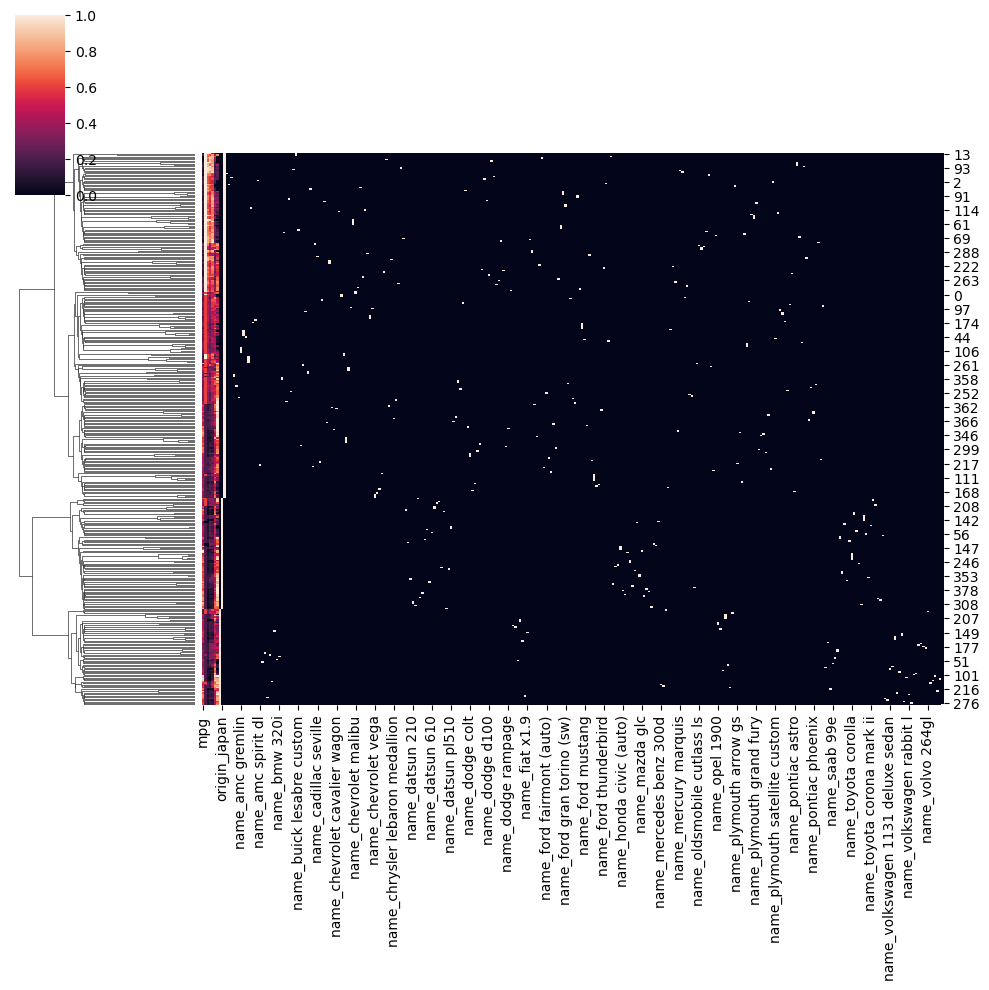

In [15]:
plt.figure(figsize=(10,8),dpi=300)
sns.clustermap(scaled_df,col_cluster=False)

In [16]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161,...,-0.035332,-0.009381,-0.022356,-0.041819,0.047063,0.129457,0.133349,0.108442,0.135296,0.054848
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494,...,-0.043695,-0.043695,-0.043695,0.015676,0.015676,-0.043695,-0.043695,-0.061873,-0.043695,-0.043695
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936,...,-0.035524,-0.035524,-0.031169,-0.015200,-0.023910,-0.050525,-0.047137,-0.068803,-0.050525,-0.051008
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625,...,0.009907,-0.008511,-0.003249,0.027009,-0.037453,-0.074288,-0.069026,-0.058623,-0.074288,-0.044030
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978,...,-0.002658,-0.001942,0.010279,0.009682,0.010875,-0.038307,-0.050528,-0.079105,-0.053211,-0.062749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
name_vw dasher (diesel),0.129457,-0.043695,-0.050525,-0.074288,-0.038307,0.149746,0.055265,0.110390,-0.025407,-0.065288,...,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,1.000000,-0.002558,-0.003622,-0.002558,-0.002558
name_vw pickup,0.133349,-0.043695,-0.047137,-0.069026,-0.050528,0.166265,0.082757,0.110390,-0.025407,-0.065288,...,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,1.000000,-0.003622,-0.002558,-0.002558
name_vw rabbit,0.108442,-0.061873,-0.068803,-0.058623,-0.079105,-0.028364,0.039327,0.156315,-0.035977,-0.092450,...,-0.003622,-0.003622,-0.003622,-0.003622,-0.003622,-0.003622,-0.003622,1.000000,-0.003622,-0.003622
name_vw rabbit c (diesel),0.135296,-0.043695,-0.050525,-0.074288,-0.053211,0.113038,0.055265,0.110390,-0.025407,-0.065288,...,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.002558,-0.003622,1.000000,-0.002558


<Axes: >

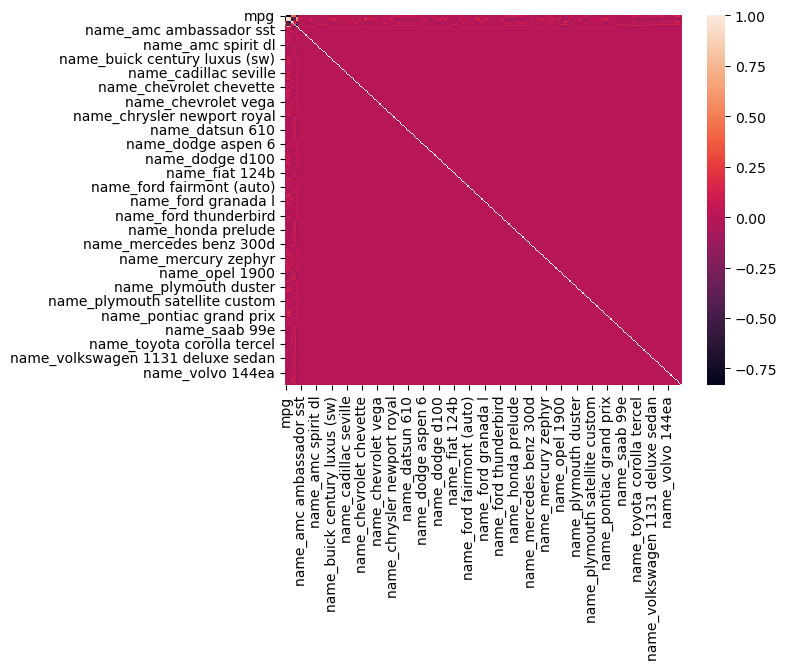

In [17]:
sns.heatmap(scaled_df.corr())

**PERFROM CLUSTERING**

In [18]:
# create an instance of a model
model = AgglomerativeClustering(n_clusters=3)

In [19]:
model

AgglomerativeClustering(n_clusters=3)

In [20]:
# obtain the cluster model
cluster_labels = model.fit_predict(scaled_df)

In [21]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mpg', ylabel='weight'>

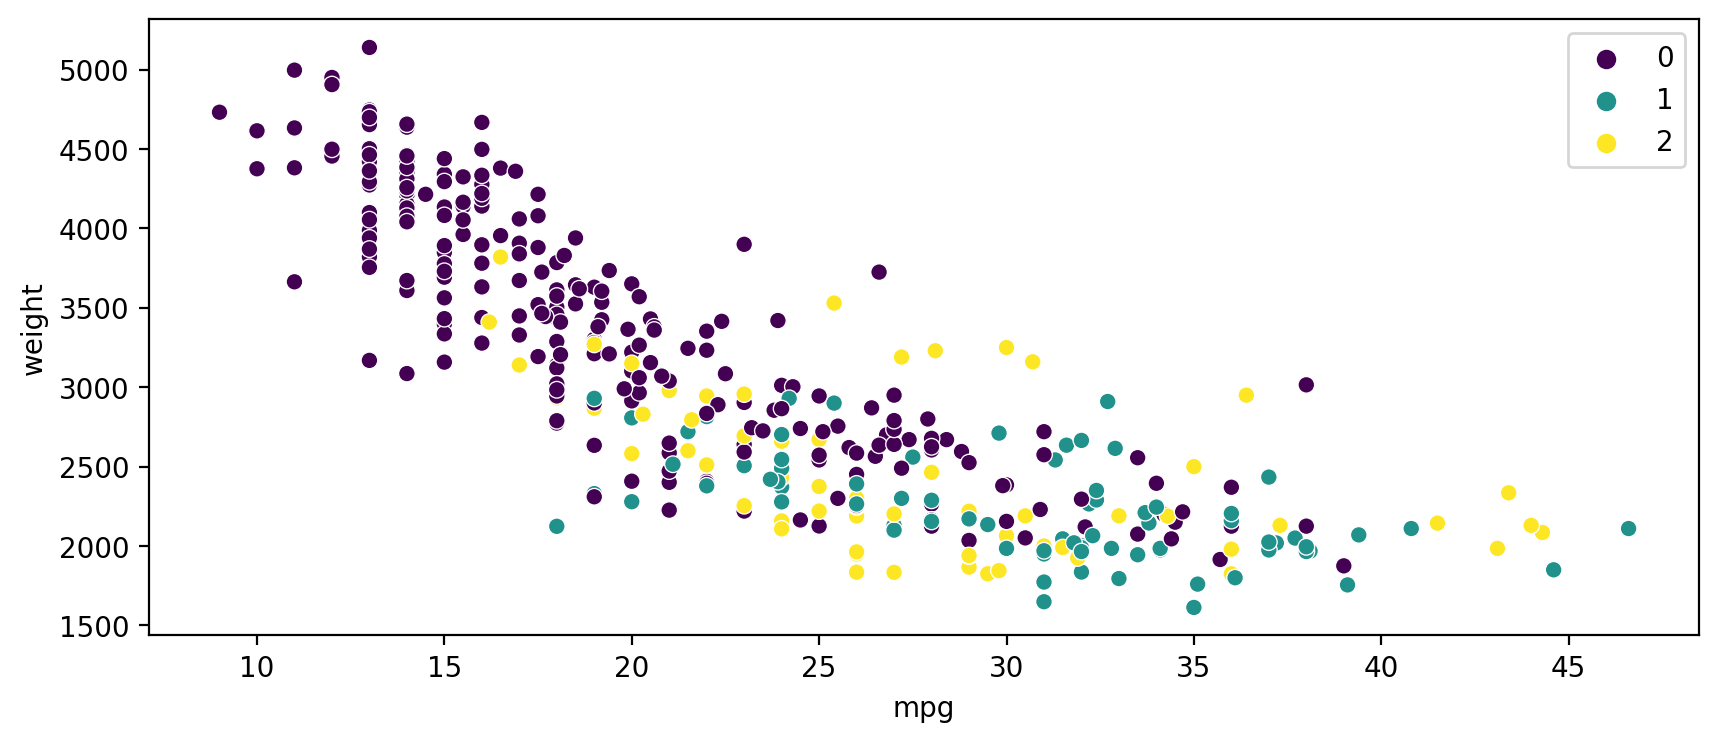

In [22]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue= cluster_labels, palette='viridis')

In [23]:
# max distance possible?
# sqrt (N_features)
n_features = 10 #i.e no of columns
max_poss_dist = np.sqrt(n_features)

In [24]:
max_poss_dist

3.1622776601683795

**APPLYING DENDROGRAM**

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mpg', ylabel='weight'>

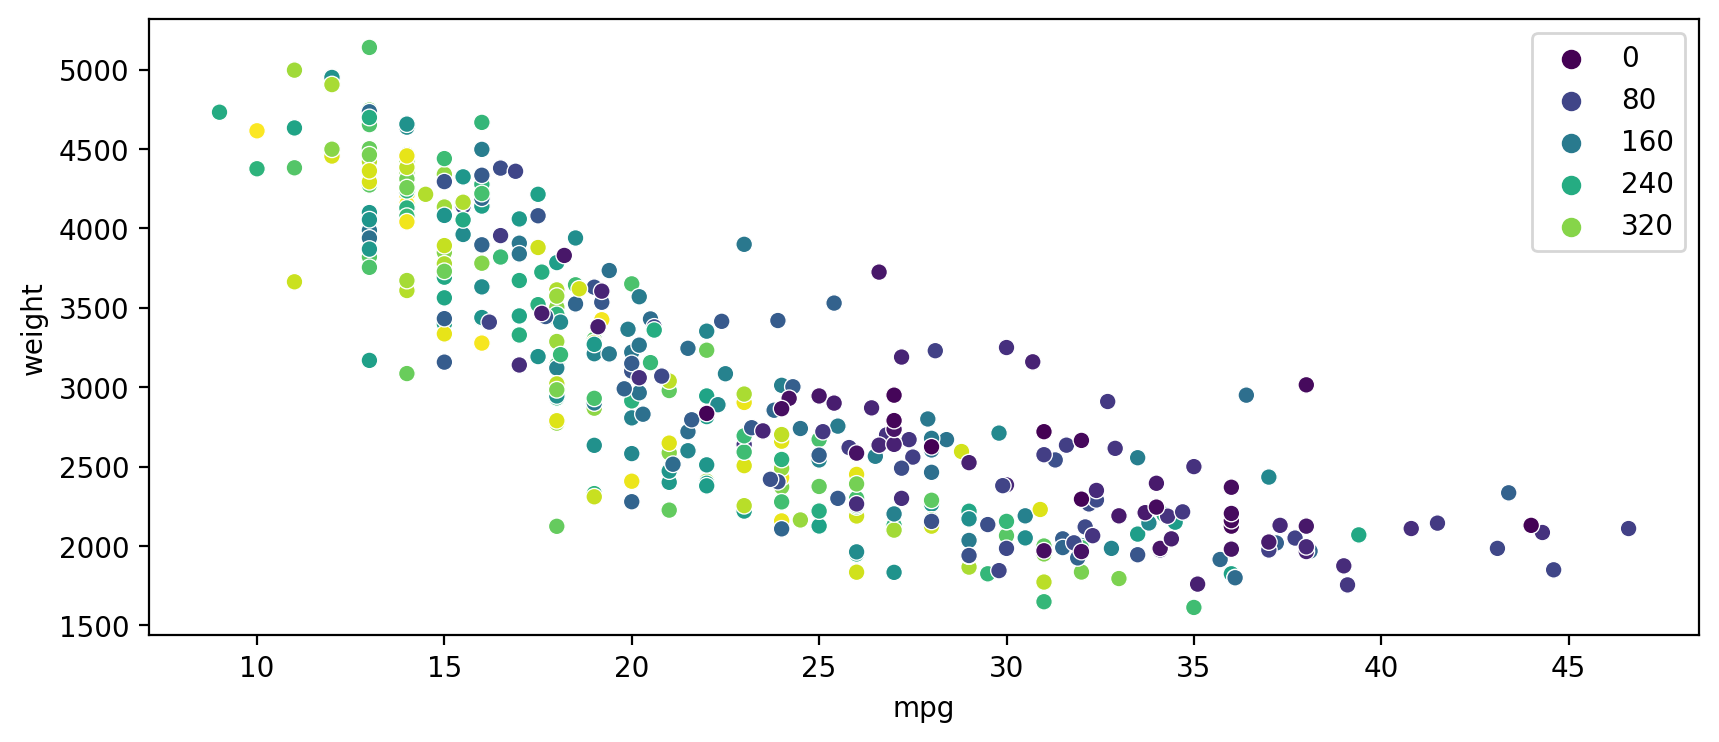

In [25]:
model2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
cluster_labels2 = model2.fit_predict(scaled_df)

plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue= cluster_labels2, palette='viridis')

In [26]:
cluster_labels2

array([323, 234, 288, 257, 230, 328, 315, 308, 322, 319, 231, 347, 387,
       301, 316, 338, 326, 320, 391, 363, 304, 381, 299, 273, 372, 389,
       253, 287, 239, 251, 198, 330, 196, 202, 245, 291, 333, 388, 232,
       390, 386, 285, 306, 284, 357, 334, 355, 281, 219, 327, 237, 289,
       350, 271, 201, 293, 272, 225, 349, 380, 297, 292, 354, 335, 249,
       241, 228, 300, 367, 348, 252, 356, 224, 368, 265, 255, 206, 295,
       361, 223, 294, 369, 302, 337, 208, 339, 150, 382, 343, 383, 311,
       366, 258, 135, 197, 290, 174, 385, 194, 351, 379, 238, 336, 340,
       283, 321, 370, 125, 212, 216, 298, 358, 205, 213, 203, 256, 342,
       378, 183, 324, 226, 373, 173, 359, 100, 159, 376, 317, 375, 312,
       177, 318, 190, 345, 220, 240, 377, 189, 307, 233, 188, 277, 260,
       168, 360, 128, 286, 329, 309, 296, 147, 254, 119, 112, 259, 268,
       164, 200, 155, 126, 305, 217, 352, 153, 221, 193,  62, 250, 269,
       353, 195, 248, 313, 374, 178, 266, 341, 229, 279, 175, 14

In [27]:
linkage_matrix = hierarchy.linkage(model.children_)

In [28]:
linkage_matrix

array([[  2.        ,   5.        ,   1.41421356,   2.        ],
       [119.        , 166.        ,   1.41421356,   2.        ],
       [150.        , 163.        ,   1.41421356,   2.        ],
       ...,
       [ 89.        , 777.        ,  56.08029957, 337.        ],
       [745.        , 778.        ,  57.48912941, 339.        ],
       [771.        , 779.        ,  65.11528238, 391.        ]])

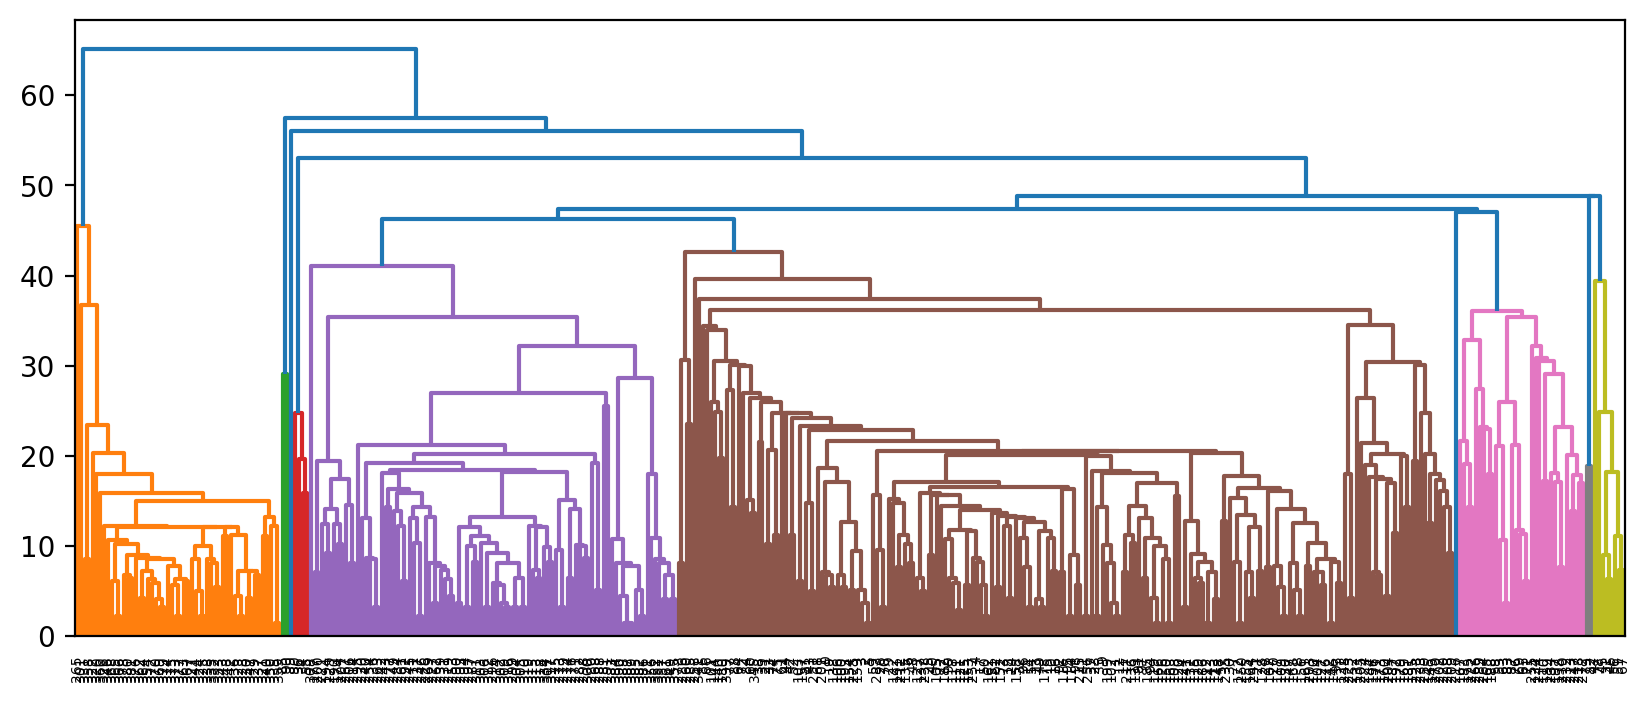

In [29]:
plt.figure(figsize=(10,4), dpi=200)
dendro = dendrogram(linkage_matrix)

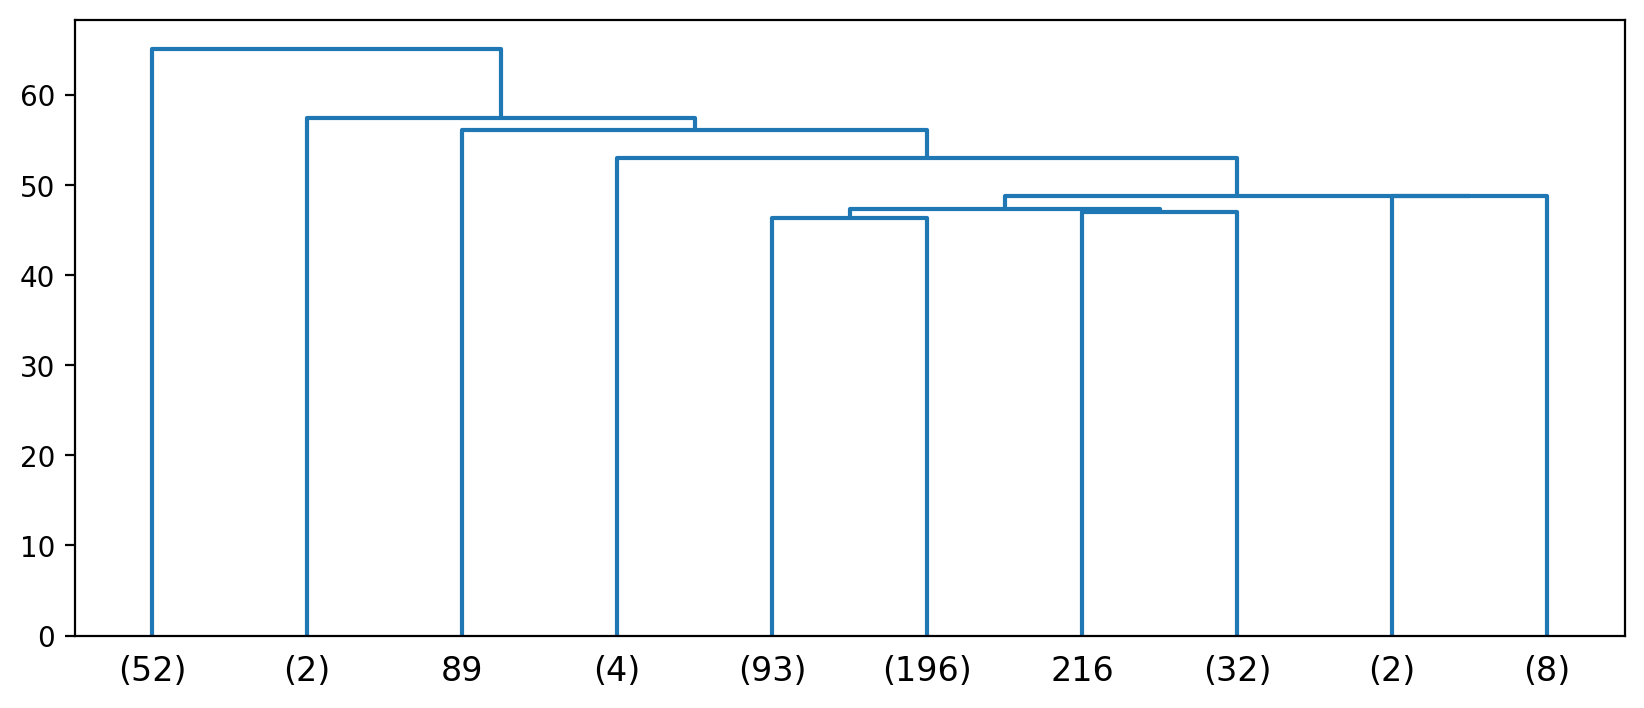

In [30]:
plt.figure(figsize=(10,4), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp',p=10)

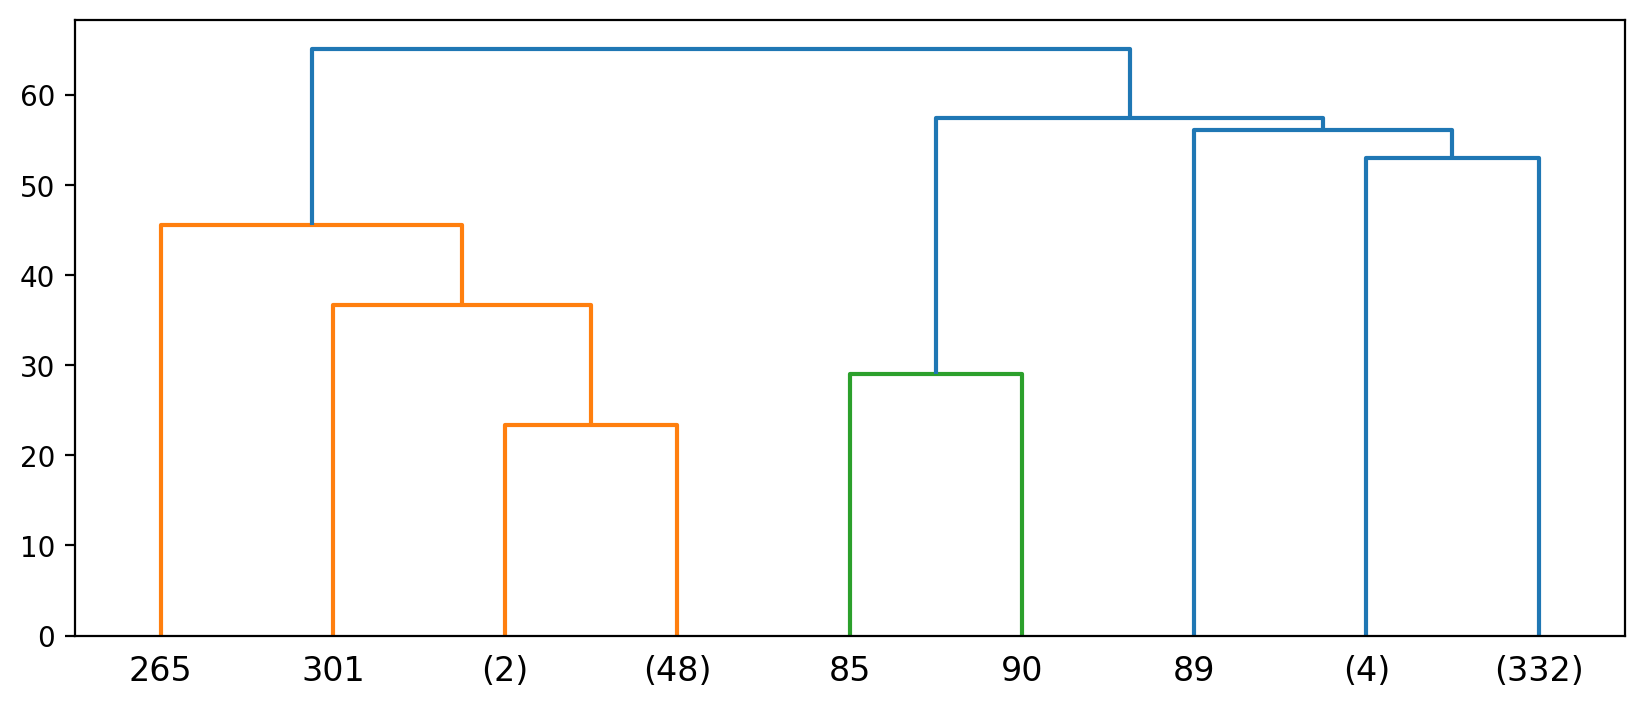

In [31]:
plt.figure(figsize=(10,4), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='level',p=3)

In [32]:
#